<a href="https://colab.research.google.com/github/aalok-1409/Prodigy_Infotech_Internship/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Accuracy: 0.9146637533381888

Confusion Matrix:
 [[7054  249]
 [ 454  481]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



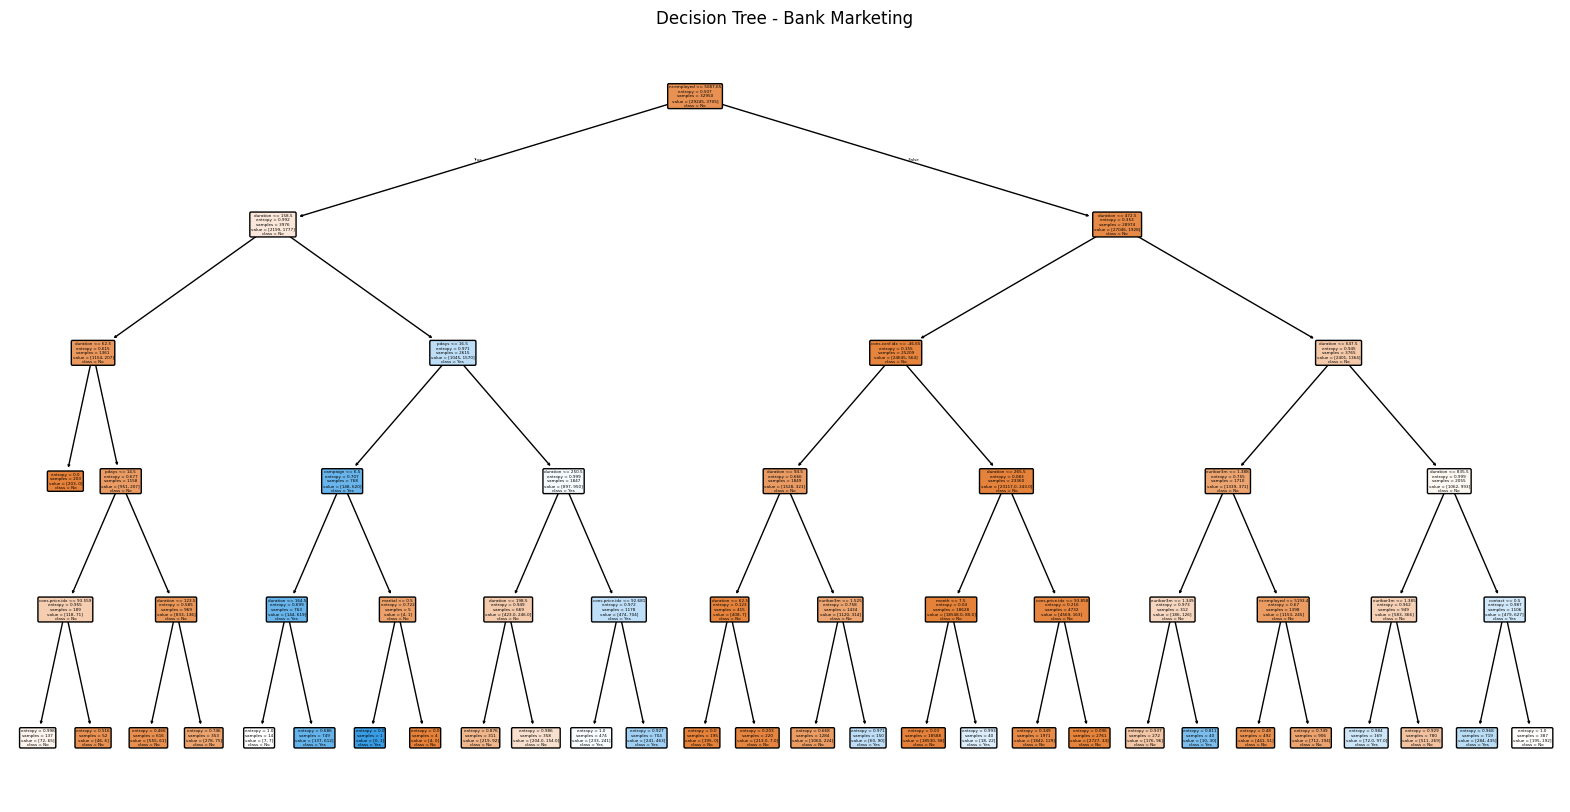

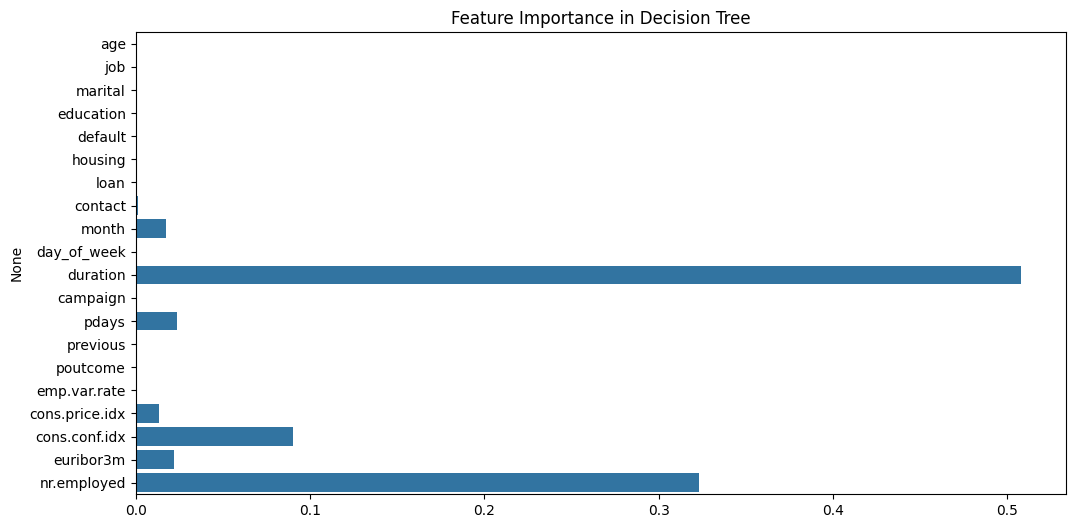

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

# Step 1: Download the dataset ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

# Step 2: Extract the desired CSV from the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Find the main data file (it's 'bank-additional-full.csv' in this zip)
    with z.open('bank-additional/bank-additional-full.csv') as f:
        df = pd.read_csv(f, sep=';')


# Step 3: Encode categorical columns
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 4: Split data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']  # Target variable: y (0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()

# Step 8: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importance in Decision Tree")
plt.show()